**Libraries**

In [1]:
# Necesssary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,median_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Loading Dataset
df = pd.read_csv('encoded_data.csv')

**Sample For Testing Models**

In [3]:
df1 = df.sample(n=50000 , random_state= 202)

**Split**

In [4]:
X_sample = df1.drop(columns=['price'],axis=1)
y_sample= df1['price']

In [5]:
# Train test split
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, 
                                                                                test_size=0.2, random_state=42)

### Testing models

In [6]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

In [7]:
# empty list to store evaluation metrics
evaluation_metrics = []

# initialize k-fold
kf = KFold(n_splits=5)

# Evaluate models
for name, model in models.items():
    mae_scores = cross_val_score(model, X_train_sample, y_train_sample, scoring='neg_mean_absolute_error', cv=kf)
    mse_scores = cross_val_score(model, X_train_sample, y_train_sample, scoring='neg_mean_squared_error', cv=kf)
    
    # Convert negative scores to positive
    mae = -mae_scores.mean()
    mse = -mse_scores.mean()
    
    # Calculate RMSE and R2 
    rmse = np.sqrt(mse)
    r2 = 1 - (mse / np.var(y_test_sample))
    
    # Calculate adjusted R2
    n = len(X_train_sample)
    p = X_train_sample.shape[1]
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    
    # Append evaluation metrics to the list
    evaluation_metrics.append({'Model': name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'Adjusted R2': adjusted_r2})

In [8]:
# Result to dataframe
output = pd.DataFrame(evaluation_metrics)
output = output.sort_values(by='R2', ascending=False)

In [9]:
output

,Model,MAE,MSE,RMSE,R2,Adjusted R2
6,XGBoost,1056.481067,2.754321e+06,1659.614831,0.875355,0.875324
4,Random Forest,1101.249358,2.922887e+06,1709.645184,0.867727,0.867693
5,Gradient Boosting,1184.060462,3.230598e+06,1797.386425,0.853801,0.853765
3,Decision Tree,1481.135150,5.397476e+06,2323.246815,0.755740,0.755679
1,Ridge Regression,1858.937313,6.474073e+06,2544.419989,0.707020,0.706946
0,Linear Regression,1858.942599,6.474073e+06,2544.420044,0.707020,0.706946
2,Lasso Regression,1858.875100,6.474090e+06,2544.423402,0.707019,0.706946
7,AdaBoost,2346.771979,8.375879e+06,2894.111089,0.620955,0.620860
9,K-Nearest Neighbors,2566.444960,1.275465e+07,3571.365906,0.422796,0.422651
8,Support Vector Machine,3458.101651,2.349340e+07,4846.999381,-0.063180,-0.063446


**XGBoost** is Providing the best results

### Hyperparameter Tuning

In [10]:
X = df.drop(columns=['price'],axis=1)
y= df['price']

In [11]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [12]:
# Standardize X_train & X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
param_grid_xgb = {
    'regressor_xgb__n_estimators': [200, 400 ,600,800,1000],  
    'regressor_xgb__max_depth': [ 3, 5, 7 , 9],  
    'regressor_xgb__learning_rate': [0.01,0.05, 0.1]
}

In [14]:
pipeline_xgb = Pipeline([('regressor_xgb', XGBRegressor())])

In [15]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [16]:
# Perform GridSearchCV for XGBRegressor
search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='r2', n_jobs=-1, verbose=4)

In [17]:
search_xgb.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('regressor_xgb',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_policy=None,
                                                     importance_type=None,
                                                     interaction_cons...
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'regressor_xgb__learning_rate': [0.01, 0.05, 0.1],
                         'regressor_xgb__max_depth': [3, 5, 7, 9],
                         'regressor_xgb__n_estimators': [200, 400, 600, 800,
                                                         1000]},
             scoring='r2', verbose=4)

In [18]:
print("Best parameters : ", search_xgb.best_params_)

Best parameters :  {'regressor_xgb__learning_rate': 0.05, 'regressor_xgb__max_depth': 9, 'regressor_xgb__n_estimators': 600}


In [19]:
print("Best score : ",search_xgb.best_score_)

Best score :  0.8988394208004978


### Final model

In [20]:
final_model =XGBRegressor(learning_rate=0.05, max_depth=9, n_estimators=600)
final_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
feature_importance = final_model.feature_importances_

sorted_indices = np.argsort(feature_importance) 
feature_importance = feature_importance[sorted_indices]

feature_importance

array([0.00456446, 0.01413566, 0.02177388, 0.03538572, 0.04136048,
       0.04688738, 0.06778846, 0.07224496, 0.18092185, 0.5149372 ],
      dtype=float32)

### Feature importances


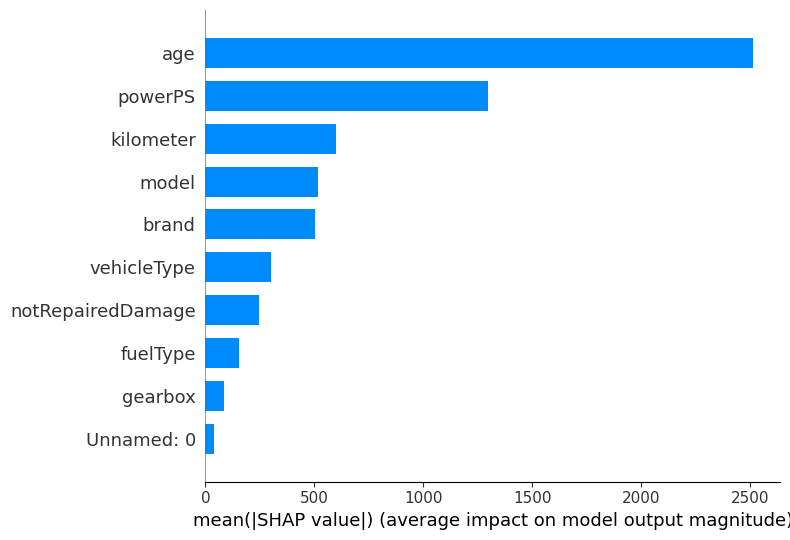

In [22]:
import shap

explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test_scaled)

# SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns, plot_type='bar')
plt.show()

### Prediction and Evaluation

In [23]:
predictions = final_model.predict(X_test_scaled)

print("R-squared:", r2_score(y_test, predictions))
print("Mean absolute error:", mean_absolute_error(y_test, predictions))
print("Mean squared error:", mean_squared_error(y_test, predictions))
print("Median absolute error:", median_absolute_error(y_test, predictions))
rmse =np.sqrt(mean_squared_error(y_test, predictions))
print("Root mean square error:", rmse)

R-squared: 0.9014478983657883
Mean absolute error: 942.5399332565589
Mean squared error: 2171725.3978644507
Median absolute error: 583.88330078125
Root mean square error: 1473.6775080947834


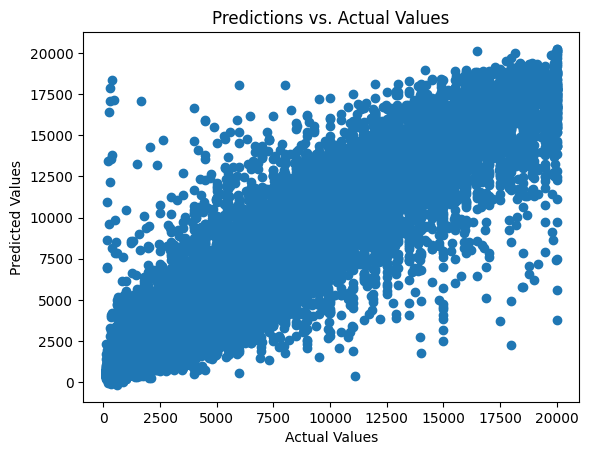

In [24]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs. Actual Values")
plt.show()

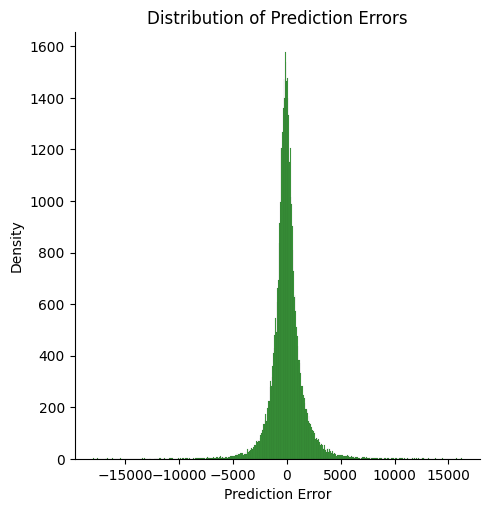

In [25]:
sns.displot(y_test - predictions, color='green')
plt.xlabel("Prediction Error")
plt.ylabel("Density")
plt.title("Distribution of Prediction Errors")
plt.show()

In [26]:
with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)